In [103]:
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [104]:
df = pd.read_csv('../../datasets/train.csv', encoding="latin-1").drop(columns=['Other_Race', 'Hispanic', 'Other_Diagnosis', 
    'Body_Part_2', 'Diagnosis_2', 'Other_Diagnosis_2', 'Alcohol', 'Drug', 'Product_1', 'Product_2', 'Product_3']).dropna()

,Unnamed: 0,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Body_Part,Diagnosis,Disposition,Location,Fire_Involvement,Narrative,Stratum,PSU,Weight
0,900763,180608221.0,5/29/2018,25,1,2.0,35.0,71.0,1.0,9.0,0.0,25YOM PAIN TO KNEE WHEN LIFTING WEIGHTS ...,L,42.0,55.4188
1,762342,180109488.0,1/1/2018,70,2,1.0,30.0,55.0,1.0,1.0,0.0,70 YOF PT STATES SHE FELL IN HER KITCHEN & HIT...,M,16.0,78.3782
2,560150,170718633.0,7/5/2017,18,1,0.0,92.0,59.0,1.0,9.0,0.0,18 YO M LAC FINGER-4-WHEELER ACCIDENT,V,17.0,16.1828
3,464771,170429466.0,4/1/2017,17,2,1.0,34.0,53.0,1.0,0.0,0.0,17 YOF A SHELF FELL ONTO PT WRIST CAUSING A CO...,C,32.0,4.7570
4,866180,180504499.0,4/27/2018,27,1,2.0,35.0,64.0,1.0,0.0,0.0,27 YOM HAS KNEE PX WHICH WORSENS WHILE PLAYING...,V,93.0,16.5919


In [105]:
print(df.columns)

Index(['Unnamed: 0', 'CPSC_Case_Number', 'Treatment_Date', 'Age', 'Sex',
       'Race', 'Body_Part', 'Diagnosis', 'Disposition', 'Location',
       'Fire_Involvement', 'Narrative', 'Stratum', 'PSU', 'Weight'],
      dtype='object')


In [106]:
body_part = LabelEncoder()
df["body_n"] = body_part.fit_transform(df["Body_Part"])
df.head()

,Unnamed: 0,CPSC_Case_Number,Treatment_Date,Age,Sex,Race,Body_Part,Diagnosis,Disposition,Location,Fire_Involvement,Narrative,Stratum,PSU,Weight,body_n
0,900763,180608221.0,5/29/2018,25,1,2.0,35.0,71.0,1.0,9.0,0.0,25YOM PAIN TO KNEE WHEN LIFTING WEIGHTS ...,L,42.0,55.4188,6
1,762342,180109488.0,1/1/2018,70,2,1.0,30.0,55.0,1.0,1.0,0.0,70 YOF PT STATES SHE FELL IN HER KITCHEN & HIT...,M,16.0,78.3782,1
2,560150,170718633.0,7/5/2017,18,1,0.0,92.0,59.0,1.0,9.0,0.0,18 YO M LAC FINGER-4-WHEELER ACCIDENT,V,17.0,16.1828,23
3,464771,170429466.0,4/1/2017,17,2,1.0,34.0,53.0,1.0,0.0,0.0,17 YOF A SHELF FELL ONTO PT WRIST CAUSING A CO...,C,32.0,4.7570,5
4,866180,180504499.0,4/27/2018,27,1,2.0,35.0,64.0,1.0,0.0,0.0,27 YOM HAS KNEE PX WHICH WORSENS WHILE PLAYING...,V,93.0,16.5919,6


In [107]:
# Body part, Age 
X = df["Age"]
X.shape

(702542,)

In [108]:
Y = df["body_n"]
Y.shape

(702542,)

In [109]:
data = {}
data['age'] = X
data['body_part'] = Y

my_data = pd.DataFrame(data, columns=['age', 'body_part'])
kmeans = KMeans(n_clusters=5).fit(my_data)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 54.75045712  11.23615899]
 [213.64363811  11.85870479]
 [ 30.11679637  12.23014688]
 [  9.92674172  11.49858786]
 [ 80.1530164   10.68894155]]


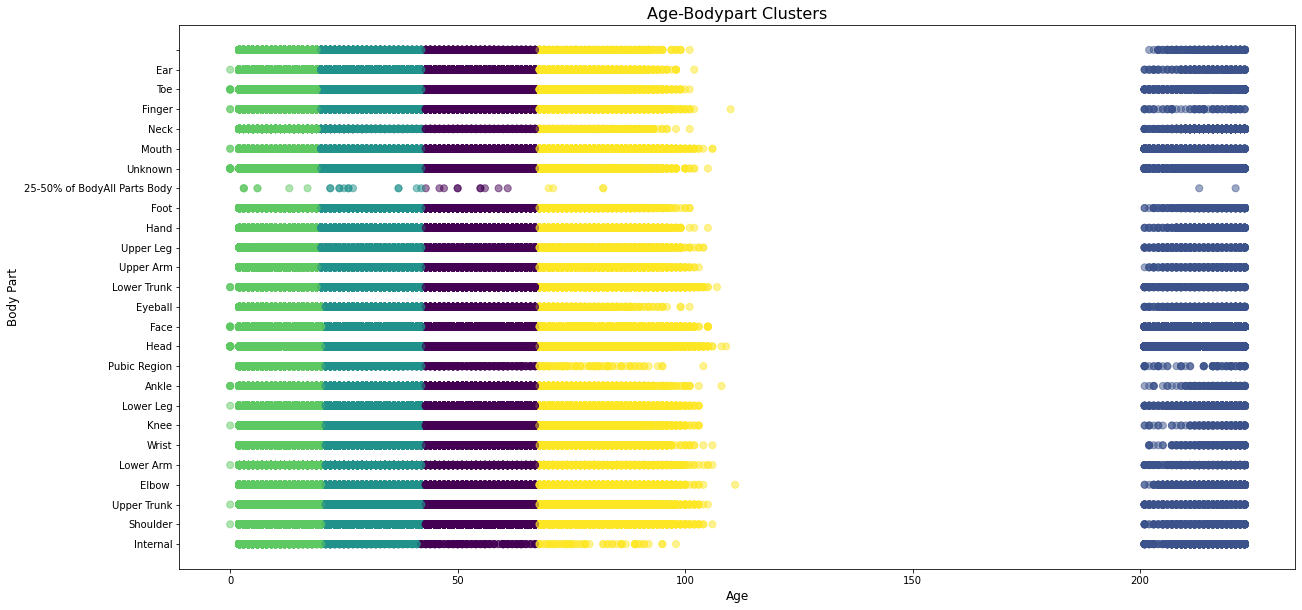

In [111]:
plt.figure(figsize=(20,10))
plt.title('Age-Bodypart Clusters', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Body Part', fontsize=12)
plt.scatter(my_data['age'], my_data['body_part'], c=kmeans.labels_.astype(float), s=50, alpha=0.5)

bodypart = ['Internal', 'Shoulder', 'Upper Trunk', 'Elbow ', 'Lower Arm', 'Wrist', 'Knee', 'Lower Leg', 'Ankle', 
'Pubic Region', 'Head', 'Face', 'Eyeball', 'Lower Trunk', 'Upper Arm', 'Upper Leg', 'Hand', 'Foot', '25-50% of Body'
'All Parts Body', 'Unknown', 'Mouth', 'Neck', 'Finger', 'Toe', 'Ear']
y1 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]

plt.yticks(y1, bodypart, rotation=0)

plt.savefig('../../outputs/age-bodypart-clusters.png')